## E03 : Optimization (Alpha-Beta Pruning)

In [1]:
import copy
import math
import numpy as np
from classes.Game import Board
from IPython.display import display
from classes.players.HumanPlayer import HumanPlayer
from classes.players.SmartComputerPlayerC4 import SmartComputerPlayer
from algos.alfabeta import alfabeta_it, minimax_it

GAME_DIMS = (3,3)

#### **E3.01** Aplicar `Alpha-Beta Pruning`

- Aplicar Alpha-Beta Pruning al siguiente árbol e identificar la decisión minimax, así como las ramas que no se requieren evaluar.    
<img src='../imgs/e3.01_tree.png' alt='Tree E3.01' width='400' height='auto'>


**Solution:**  

<img src="../imgs/e3.01_solved.png" alt="Solved Tree E3.01" width=400 height=250>

#### **E3.02** Aplicar Alpha-Beta Pruning V2
- Aplicar Alpha-Beta Pruning al siguiente árbol e identificar la decisión minimax, así como las ramas que no se requieren evaluar.     

<img src='../imgs/e3.02_tree.png' alt='Tree E3.02' width='400' height='auto'>

**Solution:**  

<img src="../imgs/e3.02_solved.png" alt="Solved Tree E3.02" width=500 height=250>

#### **E3.03:** Implementar algoritmo *Alfa-Beta Pruning*

- Implementar en *Google Colab* el algoritmo *Alpha-Beta Pruning*

- Solicitar al usuario el vector con los valores de los nodos terminales (hojas).

- Desplegar el valor de utilidad resultante.

- Probar con las siguientes entradas:
    - El árbol que se muestra en la figura.
    - El árbol que se muestra en el E3.01
    - El árbol que se muestra en el E3.02

In [ ]:
inputs = [[4,8,5,9,3,7,2,4,6],
        [10,5,7,11,12,8,9,8,5,12,11,12,9,8,7,10],
        [3,12,8,2,4,6,14,5,2]]

def albe(terminals:np.ndarray, alpha, beta):
    a = alpha; b = beta

    order = 0
    leaf_len = len(terminals)
    for i in range(2, leaf_len):
        if (len(terminals) % i == 0): order = i; break

    levels = int(math.log(leaf_len, order))

    for i in range(0, leaf_len, order):
        val = terminals[0+i:order+i]
        for j in val:
            if (levels % 2 != 0): a = max(a , j) 
            else: b =  min(b, j)
            if (a >= b): break
        if (levels % 2 == 0):
            if b >= a: a = b; b = beta
        else:
            if a <= b: b = a; a = alpha
    return a


if __name__ == "__main__":
    for i in range(len(inputs)):
        print(f"Test Input #{i+1}")
        print(f"{albe(inputs[i], -math.inf, math.inf)}\n")

#### **E3.04**

In [ ]:
b.init_state()

In [ ]:
b = Board(GAME_DIMS)
b = Board((3,3))
b.set_state(np.array([[None,1,0],[0,1,None],[1,None,0]]))
print(b.state)
print(alfabeta_it(copy.deepcopy(b), 3, -math.inf, math.inf, 0, 0))

In [ ]:
bb.init_state()

In [ ]:
bb = Board(GAME_DIMS)
bb = Board((3,3))
bb.set_state(np.array([[None,1,0],[0,1,None],[1,None,0]]))
print(bb.state)
print(minimax_it(copy.deepcopy(bb), 3, 0, 0))

#### **E3.05:** Sustituir función minimax(s) por alpha_beta_search(s)
1) En su implementación completa en Google Colab del juego de Tic-Tac-Toe sustituir la función `minimax(s)` por la versión optimizada `alpha_beta_search(s)`.

2) La dinámica del juego es la siguiente:  
    a) El usuario selecciona 'X' u 'O'.  
    b) Siempre inicia el juego 'X' (MAX).    
    c) Llevar a cabo el juego entre agente y usuario.  
    d) Desplegar el estado de juego a cada paso (movimiento)  
    e) Desplegar resultado final (ganador o empate)  

In [2]:
def play(game:Board, x_player, o_player):
    while (np.any(game.state == None) and not game.is_terminal()):
        # Gets Player X/O move
        move = x_player.get_move(game) if game.player() == 'X' else o_player.get_move(game)
        game.make_move(move)
    
        print(f"{game.state}\n")
        game.update_board(move)
        display(game.board)
    winner = game.winner()
    if winner == 'X': print(f"PLAYER {x_player.letter} HAS WON!!")
    elif winner == 'O': print(f"PLAYER {o_player.letter} HAS WON!!")
    else: print(f"GAME ENDED IN A DRAW!")
    game.init_state()

Welcome to Tic-Tac-Toe Game!!
Minimax played: [2 2]

[[None None None]
 [None None None]
 [None None 1]]



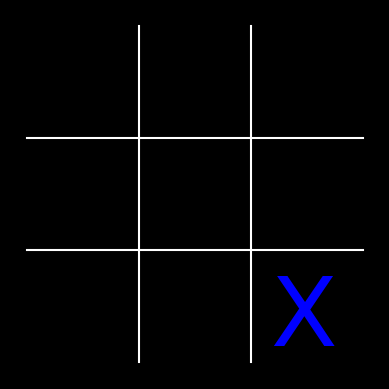

[[None None None]
 [None None None]
 [0 None 1]]



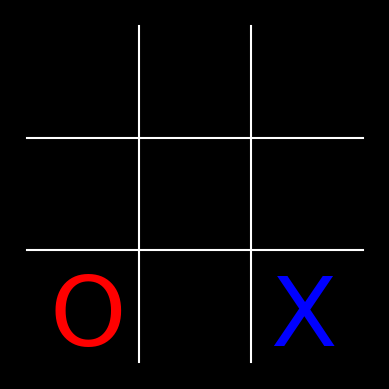

Alfa-Beta played: [0 0]

Move Utility: False

ITERATIONS TO FIND BEST MOVE: 259
RECURSIONS MADE: 49
[[1 None None]
 [None None None]
 [0 None 1]]



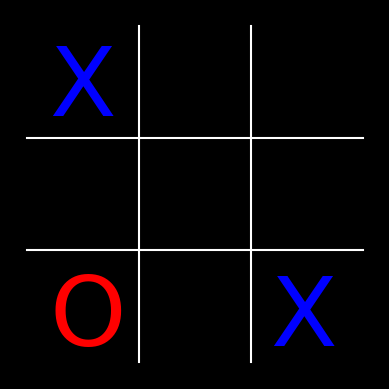

[[1 None None]
 [None 0 None]
 [0 None 1]]



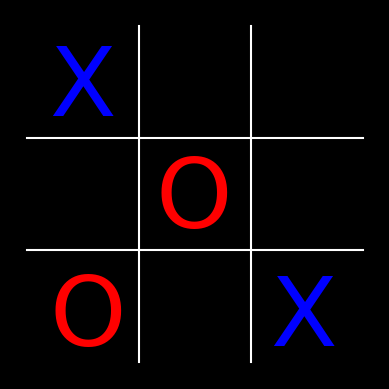

Alfa-Beta played: [0 2]

Move Utility: 1

ITERATIONS TO FIND BEST MOVE: 73
RECURSIONS MADE: 21
[[1 None 1]
 [None 0 None]
 [0 None 1]]



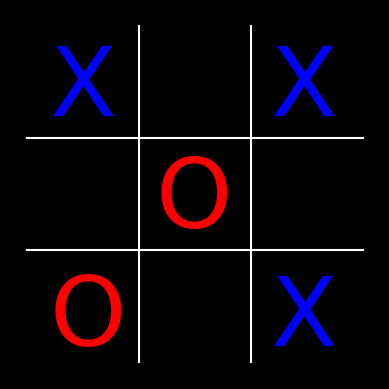

[[1 0 1]
 [None 0 None]
 [0 None 1]]



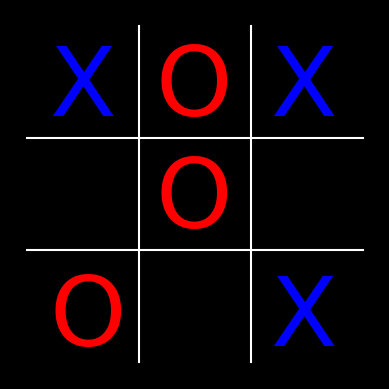

Alfa-Beta played: [1 2]

Move Utility: 1

ITERATIONS TO FIND BEST MOVE: 10
RECURSIONS MADE: 5
[[1 0 1]
 [None 0 1]
 [0 None 1]]



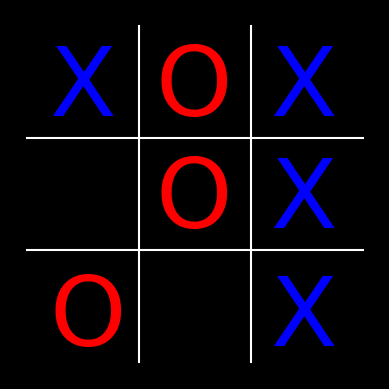

PLAYER X HAS WON!!


In [4]:
print("Welcome to Tic-Tac-Toe Game!!")
human_player = input("Select your Player X/O: ")
t = Board(GAME_DIMS)
x_player = HumanPlayer('X') if human_player == 'X' else SmartComputerPlayer('X')
o_player = HumanPlayer('O') if human_player == 'O' else SmartComputerPlayer('O')

play(t, x_player, o_player)